In [1]:
#!pip install yfinance
##ERROR: conda 4.11.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
#!conda install -c conda-forge ruamel.yaml
#!pip install yahoofinancials

In [2]:
# Get Data From Yahoo Finance.
# https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/
import pandas as pd
import numpy as np
import yfinance as yf  #https://github.com/ranaroussi/yfinance
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

In [3]:
# Get Full Data # aapl_df = yf.download('AAPL')
aapl_df = yf.download('AAPL', 
                      start='2021-02-26', 
                      end='2022-02-25', 
                      progress=False,
                      auto_adjust=True,  # adjusted for splits
)
aapl_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-25,123.943339,125.712821,119.827801,120.275139,148199500
2021-02-26,121.865685,124.112334,120.483898,120.543549,164560400
2021-03-01,123.018835,127.174138,122.064508,127.034966,116307900
2021-03-02,127.651307,127.959473,124.271394,124.380745,102260900
2021-03-03,124.072573,124.967257,121.120120,121.338821,112966300


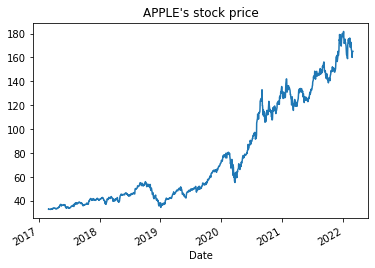

In [4]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [5]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-01 to 2022-02-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB


In [6]:
aapl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-03-01,32.547554,33.081003,32.479104,32.996029,145658400,0.0,0.0
2017-03-02,33.045594,33.111685,32.752903,32.800114,104844000,0.0,0.0
2017-03-03,32.757631,33.005474,32.712783,32.993671,84432400,0.0,0.0
2017-03-06,32.896893,32.991312,32.715145,32.889812,87000000,0.0,0.0
2017-03-07,32.823724,33.040881,32.759993,32.932304,69785200,0.0,0.0
...,...,...,...,...,...,...,...
2022-02-22,164.979996,166.690002,162.149994,164.320007,91162800,0.0,0.0
2022-02-23,165.539993,166.149994,159.750000,160.070007,90009200,0.0,0.0
2022-02-24,152.580002,162.850006,152.000000,162.740005,141147500,0.0,0.0


In [7]:
#ticker.info
#ticker.recommendations

In [8]:
df1=aapl_df.reset_index()['Close']

In [9]:
#df1.shape

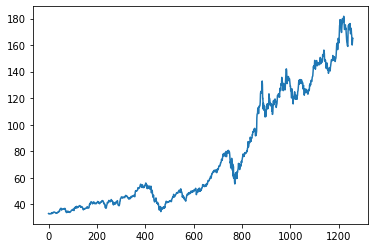

In [10]:
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

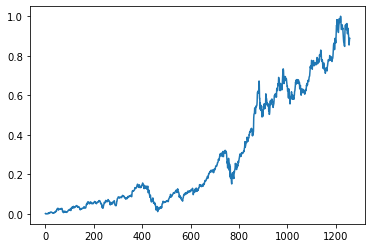

In [12]:
##df1.plot(title="APPLE's stock price")
plt.plot(df1)

In [13]:
# 65% as training data. 
training_size=int(len(df1)*0.65)
training_size

818

In [14]:
test_size=len(df1)-training_size
test_size

441

In [15]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


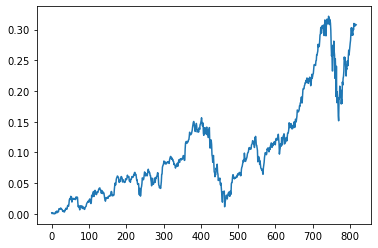

In [16]:
#train_data.shape
plt.plot(train_data)

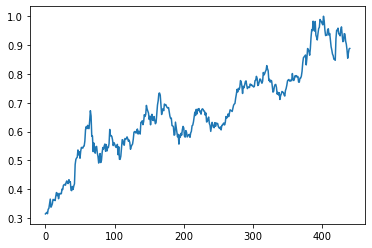

In [17]:
plt.plot(test_data)

In [18]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_full, y_full = create_dataset(df1, time_step)

In [20]:
y_train.shape

(717,)

In [21]:
X_train.shape #(717, 100)

(717, 100)

In [22]:
#X_full.shape # (1158, 100)
#y_full.shape # (1158,)

In [23]:
#X_train[:100]

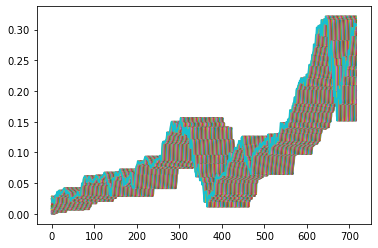

In [24]:
plt.plot(X_train)

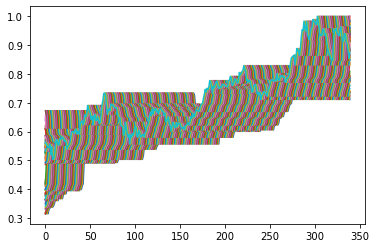

In [25]:
plt.plot(X_test)

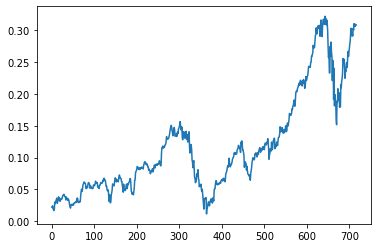

In [26]:
plt.plot(y_train)

In [27]:
X_train

array([[0.00175795, 0.00044347, 0.00174213, ..., 0.02053001, 0.01944855,
        0.01933726],
       [0.00044347, 0.00174213, 0.0010453 , ..., 0.01944855, 0.01933726,
        0.0222315 ],
       [0.00174213, 0.0010453 , 0.0013304 , ..., 0.01933726, 0.0222315 ,
        0.02326513],
       ...,
       [0.26510174, 0.27616133, 0.27134139, ..., 0.31000707, 0.30605847,
        0.30944302],
       [0.27616133, 0.27134139, 0.27525344, ..., 0.30605847, 0.30944302,
        0.30585929],
       [0.27134139, 0.27525344, 0.27292604, ..., 0.30944302, 0.30585929,
        0.30814886]])

LSTM
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.
LSTM has three gates:
The input gate: The input gate adds information to the cell state,
The forget gate: It removes the information that is no longer required by the model,
The output gate: Output Gate at LSTM selects the information to be shown as output.
 

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_full = X_full.reshape(X_full.shape[0],X_full.shape[1] , 1)

In [29]:
y_train =y_train.reshape(y_train.shape[0],1)
y_test =y_test.reshape(y_test.shape[0],1)
y_full =y_full.reshape(y_full.shape[0],1)

In [30]:
#y_train.shape #(717, 1)

In [31]:
#X_train.shape
X_train

array([[[0.00175795],
        [0.00044347],
        [0.00174213],
        ...,
        [0.02053001],
        [0.01944855],
        [0.01933726]],

       [[0.00044347],
        [0.00174213],
        [0.0010453 ],
        ...,
        [0.01944855],
        [0.01933726],
        [0.0222315 ]],

       [[0.00174213],
        [0.0010453 ],
        [0.0013304 ],
        ...,
        [0.01933726],
        [0.0222315 ],
        [0.02326513]],

       ...,

       [[0.26510174],
        [0.27616133],
        [0.27134139],
        ...,
        [0.31000707],
        [0.30605847],
        [0.30944302]],

       [[0.27616133],
        [0.27134139],
        [0.27525344],
        ...,
        [0.30605847],
        [0.30944302],
        [0.30585929]],

       [[0.27134139],
        [0.27525344],
        [0.27292604],
        ...,
        [0.30944302],
        [0.30585929],
        [0.30814886]]])

In [32]:
X_test

array([[[0.31435391],
        [0.31682597],
        [0.3197791 ],
        ...,
        [0.57166032],
        [0.55144942],
        [0.56162134]],

       [[0.31682597],
        [0.3197791 ],
        [0.31513372],
        ...,
        [0.55144942],
        [0.56162134],
        [0.55736638]],

       [[0.3197791 ],
        [0.31513372],
        [0.33036406],
        ...,
        [0.56162134],
        [0.55736638],
        [0.54992016]],

       ...,

       [[0.72716584],
        [0.73486063],
        [0.71137483],
        ...,
        [0.91345939],
        [0.90285851],
        [0.88286449]],

       [[0.73486063],
        [0.71137483],
        [0.72455634],
        ...,
        [0.90285851],
        [0.88286449],
        [0.85434949]],

       [[0.71137483],
        [0.72455634],
        [0.73051143],
        ...,
        [0.88286449],
        [0.85434949],
        [0.87226361]]])

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
#X_train
#y_train

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, y_train, epochs = 100, batch_size = 100)
#model.fit(X_test, y_test, epochs = 100, batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 151ms/step - loss: 0.0084
Epoch 2/100
8/8 [==============================] - 1s 145ms/step - loss: 0.0023
Epoch 3/100
8/8 [==============================] - 1s 144ms/step - loss: 0.0011
Epoch 4/100
8/8 [==============================] - 1s 153ms/step - loss: 6.0788e-04
Epoch 5/100
8/8 [==============================] - 2s 202ms/step - loss: 5.1257e-04
Epoch 6/100
8/8 [==============================] - 2s 188ms/step - loss: 4.5370e-04
Epoch 7/100
8/8 [==============================] - 2s 188ms/step - loss: 4.3261e-04
Epoch 8/100
8/8 [==============================] - 2s 200ms/step - loss: 4.0905e-04
Epoch 9/100
8/8 [==============================] - 2s 188ms/step - loss: 3.9530e-04
Epoch 10/100
8/8 [==============================] - 1s 184ms/step - loss: 3.7866e-04
Epoch 11/100
8/8 [==============================] - 1s 185ms/step - loss: 3.7011e-04
Epoch 12/100
8/8 [==============================] - 1s 184ms/step - loss: 3.7624e-04
E

8/8 [==============================] - 1s 184ms/step - loss: 1.3466e-04
Epoch 98/100
8/8 [==============================] - 2s 188ms/step - loss: 1.3546e-04
Epoch 99/100
8/8 [==============================] - 2s 185ms/step - loss: 1.4037e-04
Epoch 100/100
8/8 [==============================] - 1s 185ms/step - loss: 1.7174e-04


In [36]:
#X_train #(717, 100, 1)

In [37]:
# train_predict=model.predict(X_train)
# test_predict=model.predict(X_test)
# train_predict=scaler.inverse_transform(train_predict)
# test_predict=scaler.inverse_transform(test_predict)

In [38]:
# Predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
full_predict=model.predict(X_full)

In [39]:
#X_test.shape #(340, 100, 1)
#X_test[0]
#plt.plot(train_predict)

In [40]:
#train_predict#(717, 1)
#test_predict.shape # (340, 1)
#test_predict[0]

In [41]:

train_predict_inv=scaler.inverse_transform(train_predict)
test_predict_inv=scaler.inverse_transform(test_predict)
full_predict_inv=scaler.inverse_transform(full_predict)
y_train_inv=scaler.inverse_transform(y_train)
y_test_inv=scaler.inverse_transform(y_test)
y_full_inv=scaler.inverse_transform(y_full)

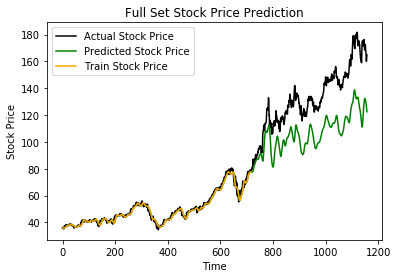

In [42]:
plt.plot(y_full_inv, color = 'black', label = 'Actual Stock Price')
plt.plot(full_predict_inv, color = 'green', label = 'Predicted Stock Price')
plt.plot(train_predict_inv, color = 'orange', label = 'Train Stock Price')
plt.title('Full Set Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

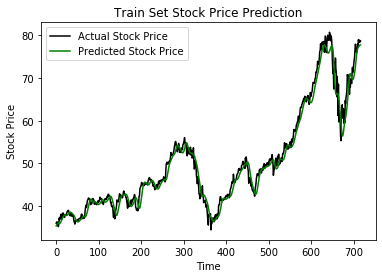

In [48]:
#train_predict.shape # 718

##plt.plot(train_predict)
##plt.plot(y_train)

plt.plot(y_train_inv, color = 'black', label = 'Actual Stock Price')
plt.plot(train_predict_inv, color = 'green', label = 'Predicted Stock Price')
plt.title('Train Set Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

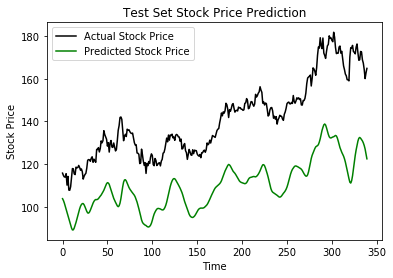

In [49]:
plt.plot(y_test_inv, color = 'black', label = 'Actual Stock Price')
plt.plot(test_predict_inv, color = 'green', label = 'Predicted Stock Price')
plt.title('Test Set Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_inv,train_predict_inv))

1.8188521932808808

In [46]:
mean_squared_error(y_train_inv,train_predict_inv)

3.3082233010026707

In [47]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)